In [1]:
# Este entorno de Python 3 es similar a Jupyter Notebook
# Viene con varias librerías instaladas. Para más információn podés consultar 
# la imagen de docker que utiliza (https://github.com/kaggle/docker-python)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Los archivos del zip "aap2020unlp.zip" están disponibles automáticamente en la 
# carpeta "/kaggle/input/aap2020unlp"
# (o "../input/aap2020unlp")
# Por ejemplo, el siguiente código imprime todos los archivos disponibles:
import os
for dirname, _, filenames in os.walk('/tf/data/aa2020/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cualquier resultado que guarden en el directorio actual queda como un "output" en el workspace

/tf/data/aa2020/data/v1/derived.csv
/tf/data/aa2020/data/v1/val/pneumonia/0176.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0255.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0124.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0278.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0340.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0174.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0056.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0339.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0305.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0059.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0248.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0090.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0341.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0196.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0103.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0120.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0276.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0277.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0197.jpg
/tf/data/aa2020/data/v1/val/pneumonia/0271.jpg
/tf/data/aa2020/data/v1/

/tf/data/aa2020/data/v1/dataset/pneumonia/0953.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/1840.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2895.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2618.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0991.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2842.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2271.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/1910.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/5228.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/3693.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2453.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/3815.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/4556.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2080.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2599.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0735.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/4244.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0906.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0121.jpg
/tf/data/aa2020/data/v1/dataset

/tf/data/aa2020/data/v1/dataset/pneumonia/3214.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0396.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/4009.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/2030.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/3238.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/4369.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/1956.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/1727.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/1935.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/4099.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/5092.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/3487.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/1825.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/4352.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0078.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/5185.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0845.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0877.jpg
/tf/data/aa2020/data/v1/dataset/pneumonia/0364.jpg
/tf/data/aa2020/data/v1/dataset

/tf/data/aa2020/data/v1/dataset/normal/2622.jpg
/tf/data/aa2020/data/v1/dataset/normal/1008.jpg
/tf/data/aa2020/data/v1/dataset/normal/0703.jpg
/tf/data/aa2020/data/v1/dataset/normal/1260.jpg
/tf/data/aa2020/data/v1/dataset/normal/0695.jpg
/tf/data/aa2020/data/v1/dataset/normal/1202.jpg
/tf/data/aa2020/data/v1/dataset/normal/0455.jpg
/tf/data/aa2020/data/v1/dataset/normal/1781.jpg
/tf/data/aa2020/data/v1/dataset/normal/2135.jpg
/tf/data/aa2020/data/v1/dataset/normal/2748.jpg
/tf/data/aa2020/data/v1/dataset/normal/2053.jpg
/tf/data/aa2020/data/v1/dataset/normal/2695.jpg
/tf/data/aa2020/data/v1/dataset/normal/0884.jpg
/tf/data/aa2020/data/v1/dataset/normal/0085.jpg
/tf/data/aa2020/data/v1/dataset/normal/1844.jpg
/tf/data/aa2020/data/v1/dataset/normal/0084.jpg
/tf/data/aa2020/data/v1/dataset/normal/0218.jpg
/tf/data/aa2020/data/v1/dataset/normal/0896.jpg
/tf/data/aa2020/data/v1/dataset/normal/0394.jpg
/tf/data/aa2020/data/v1/dataset/normal/1715.jpg
/tf/data/aa2020/data/v1/dataset/normal/2

/tf/data/aa2020/data/v1/train/pneumonia/3739.jpg
/tf/data/aa2020/data/v1/train/pneumonia/2972.jpg
/tf/data/aa2020/data/v1/train/pneumonia/0920.jpg
/tf/data/aa2020/data/v1/train/pneumonia/3243.jpg
/tf/data/aa2020/data/v1/train/pneumonia/1808.jpg
/tf/data/aa2020/data/v1/train/pneumonia/1200.jpg
/tf/data/aa2020/data/v1/train/pneumonia/4364.jpg
/tf/data/aa2020/data/v1/train/pneumonia/3737.jpg
/tf/data/aa2020/data/v1/train/pneumonia/0306.jpg
/tf/data/aa2020/data/v1/train/pneumonia/0730.jpg
/tf/data/aa2020/data/v1/train/pneumonia/1299.jpg
/tf/data/aa2020/data/v1/train/pneumonia/0390.jpg
/tf/data/aa2020/data/v1/train/pneumonia/3910.jpg
/tf/data/aa2020/data/v1/train/pneumonia/2246.jpg
/tf/data/aa2020/data/v1/train/pneumonia/1421.jpg
/tf/data/aa2020/data/v1/train/pneumonia/0050.jpg
/tf/data/aa2020/data/v1/train/pneumonia/4587.jpg
/tf/data/aa2020/data/v1/train/pneumonia/3361.jpg
/tf/data/aa2020/data/v1/train/pneumonia/4291.jpg
/tf/data/aa2020/data/v1/train/pneumonia/0805.jpg
/tf/data/aa2020/data

/tf/data/aa2020/data/v1/train/normal/1747.jpg
/tf/data/aa2020/data/v1/train/normal/1081.jpg
/tf/data/aa2020/data/v1/train/normal/2109.jpg
/tf/data/aa2020/data/v1/train/normal/1526.jpg
/tf/data/aa2020/data/v1/train/normal/1455.jpg
/tf/data/aa2020/data/v1/train/normal/1357.jpg
/tf/data/aa2020/data/v1/train/normal/2001.jpg
/tf/data/aa2020/data/v1/train/normal/0444.jpg
/tf/data/aa2020/data/v1/train/normal/0040.jpg
/tf/data/aa2020/data/v1/train/normal/1226.jpg
/tf/data/aa2020/data/v1/train/normal/0493.jpg
/tf/data/aa2020/data/v1/train/normal/0980.jpg
/tf/data/aa2020/data/v1/train/normal/1878.jpg
/tf/data/aa2020/data/v1/train/normal/2099.jpg
/tf/data/aa2020/data/v1/train/normal/1959.jpg
/tf/data/aa2020/data/v1/train/normal/0460.jpg
/tf/data/aa2020/data/v1/train/normal/0201.jpg
/tf/data/aa2020/data/v1/train/normal/1782.jpg
/tf/data/aa2020/data/v1/train/normal/1963.jpg
/tf/data/aa2020/data/v1/train/normal/0596.jpg
/tf/data/aa2020/data/v1/train/normal/1242.jpg
/tf/data/aa2020/data/v1/train/norm

Hay 3 directorios con los tres subconjuntos de datos:  ['derived.csv', 'val', 'test', 'dataset', 'train']
La carpeta de cada subconjunto tiene tres subcarpetas: normal, covid y pneumonia
Las imágenes tienen tamaño: (600, 600)


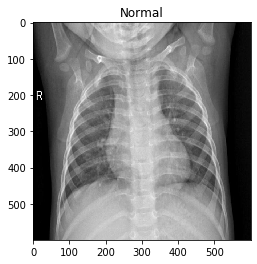

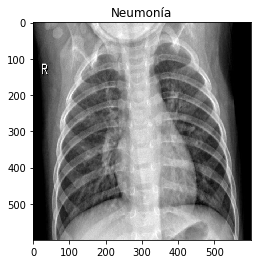

In [2]:
from tensorflow.keras.preprocessing.image import load_img

dataset_folderpath="/tf/data/aa2020/data/v1"
print("Hay 3 directorios con los tres subconjuntos de datos: ",os.listdir(dataset_folderpath))
print("La carpeta de cada subconjunto tiene tres subcarpetas: normal, covid y pneumonia")

train_folderpath = os.path.join(dataset_folderpath, "train")
val_folderpath = os.path.join(dataset_folderpath, "val")
test_folderpath = os.path.join(dataset_folderpath, "test")

img_name = '0000.jpg'
image_path= f'normal/{img_name}'
img_normal = load_img(os.path.join(train_folderpath, image_path))

print(f"Las imágenes tienen tamaño: {img_normal.size}")

plt.imshow(img_normal)
plt.title("Normal")
plt.show()

# img_name = '0000.jpg'
# image_path= f'covid/{img_name}'
# img_covid = load_img(os.path.join(train_folderpath, image_path))
# plt.imshow(img_covid)
# plt.title("Covid")
# plt.show()


img_name = '0000.jpg'
image_path= f'pneumonia/{img_name}'
img_pneumonia = load_img(os.path.join(train_folderpath,image_path))
plt.imshow(img_pneumonia)
plt.title("Neumonía")
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Tamaño objetivo para escalar las imágenes. 
IMG_SIZE = 32
h,w,c = IMG_SIZE, IMG_SIZE, 3
batch_size = 32

# Preprocesamiento de cada subconjunto
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de los subconjuntos. Reciben un directorio, y 
# cada carpeta del directorio se interpreta como una clase distinta.
# En este caso como cada directorio tiene 3 subdirectorios, normal, covid y pneumonia,
# por ende, habrá tres clases.
train_generator = train_datagen.flow_from_directory(
    train_folderpath, # directorio de donde cargar las imagenes (train)
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_folderpath, # directorio de donde cargar las imagenes (val)
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_folderpath, # directorio de donde cargar las imagenes (test)
    target_size=(h, w),
    batch_size=batch_size,
    class_mode=None, # IMPORTANTE ya que los ej de test no tienen clase
    shuffle=False # IMPORTANTE ya que nos importa el orden para el archivo de submission
    )


n_train=train_generator.samples
n_val=val_generator.samples
n_test=test_generator.samples
n_clases=train_generator.num_classes
print(f"Los conjuntos de train, val y test tienen {n_train}, {n_val} y {n_test} ejemplos respectivamente.")
print(f"Los conjuntos de datos tienen {n_clases} clases.")

Found 6914 images belonging to 3 classes.
Found 713 images belonging to 3 classes.
Found 915 images belonging to 1 classes.
Los conjuntos de train, val y test tienen 6914, 713 y 915 ejemplos respectivamente.
Los conjuntos de datos tienen 3 clases.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

def create_model():
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(h, w, c)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    return model

In [5]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [ ]:
from tensorflow.keras.optimizers import Adam

lr = 1e-3
epochs = 2

optim = Adam(lr=lr, decay=lr / epochs)
val_steps = max(1, n_val // batch_size)

# Compilation with weighted metrics
model.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy"], weighted_metrics=['accuracy'])
model.fit_generator(train_generator,
                    steps_per_epoch=n_train // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_steps
                    )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 216 steps, validate for 22 steps
Epoch 1/2
166/216 [======================>.......] - ETA: 5s - loss: 0.4780 - accuracy: 0.7669 - accuracy_1: 0.7669

In [ ]:
# Evaluar el accuracy del modelo en el conjunto entero de entrenamiento
print("*********** Conjunto de entrenamiento ***********")
train_generator.reset()
_ = model.predict_generator(train_generator, steps=n_train // batch_size)
scores = model.evaluate_generator(train_generator, steps=n_train // batch_size)
for metric, score in zip(model.metrics_names, scores):
    print(f"{metric}: {score:.2f}")

print()
# Evaluar el accuracy del modelo en el conjunto entero de validación
print("*********** Conjunto de validación ***********")
val_generator.reset()
_ = model.predict_generator(val_generator, steps=n_val // batch_size)
scores = model.evaluate_generator(val_generator, steps=n_val // batch_size)
for metric, score in zip(model.metrics_names, scores):
    print(f"{metric}: {score:.2f}")

In [ ]:
# predecir sobre el conjunto de test y generar el csv resultante
y_prob = model.predict_generator(test_generator, steps=n_test // batch_size + 1)
y_pred = np.argmax(y_prob, axis=-1)
# quitar el nombre de la carpeta del nombre de archivo
filenames = [os.path.basename(f) for f in test_generator.filenames]
# igual cant de archivos que de predicciones
assert(len(y_pred) == len(filenames))

# Generar CSV con las predicciones
import csv
with open('solutions.csv', mode='w') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['Id','Category'])
    print("Id,Category")
    for f, y in zip(filenames, y_pred):
        print(f"{f},{str(y)}")
        writer.writerow([f,str(y)])

In [ ]:
import csv
from collections import Counter

y_true = []

with open('/tf/data/aa2020/data/v1/derived.csv', mode='r') as f:
    reader = csv.DictReader(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        y_true.append(int(row['Expected']))
        
c = Counter(y_true)
print(c)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()